##### Copyright 2025 Google LLC.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Use Gemini thinking

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) and [Gemini 2.5 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro-preview-06-05) are models that are trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result,
those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## Understanding the thinking models

[Gemini 2.5 models](https://ai.google.dev/gemini-api/docs/thinking) are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

On this notebook all examples are using `Gemini 2.5 Pro` and `Gemini 2.5 Flash` with the new `thinking_budget` parameter. For more information about using the `thinking_budget` with the Gemini thinking model, check the [documentation](https://ai.google.dev/gemini-api/docs/thinking).

## Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The new **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini models using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started](../quickstarts/Get_started.ipynb) notebook.

In [1]:
%pip install -U -q "google-genai>=1.16.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.0/200.0 kB 7.0 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [2]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [3]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [4]:
MODEL_ID="gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05"] {"allow-input":true, isTemplate: true}

### Imports

In [5]:
import json
from PIL import Image
from IPython.display import display, Markdown

## Using the thinking models

Here are some quite complex examples of what Gemini thinking models can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini thinking models are more consistent thanks to their thinking step.

### Using adaptive thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinking_budget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.

In [6]:
prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

This is a fun one, requiring a bit of niche animal knowledge!

Given the criteria:
1.  **Aquatic Mammal:** Lives in water.
2.  **Doesn't live in the sea:** Excludes whales, dolphins, seals, manatees, sea otters, etc. (focus on freshwater).
3.  **Smaller than a cat:** This is the key filter that eliminates beavers, most river otters, muskrats (often cat-sized, but can be larger), and platypus (can be cat-sized).

The most fitting animal that meets *all* these criteria precisely is a:

**Water Shrew** (e.g., Eurasian Water Shrew, American Water Shrew) or a **Desman** (e.g., Pyrenean Desman, Russian Desman).

*   **Water Shrews:** Are tiny, mouse-sized mammals, perfectly at home in freshwater streams and rivers. They are definitely smaller than a cat.
*   **Desmans:** Are similar to moles but adapted for aquatic life, found in freshwater. They have long, mobile snouts and webbed feet, and are also distinctly smaller than a cat.

Let's pick **Water Shrew** as the primary guess, as it's a bit more widely known than a Desman.

---

**How to make sure (using 20 Questions):**

Here's a sequence of questions you could ask to narrow it down and confirm:

1.  **Is it an animal?** (Yes, obviously)
2.  **Is it a mammal?** (Yes)
3.  **Does it live primarily in freshwater environments like rivers, streams, or ponds, rather than the ocean?** (Yes - this confirms "doesn't live in the sea")
4.  **Is it smaller than a typical house cat?** (Yes - this is crucial)
5.  **Does it have fur?** (Yes)
6.  **Does it lay eggs?** (No - eliminates platypus)
7.  **Is it known for building large structures like dams or lodges?** (No - eliminates beavers, which are also too big anyway)
8.  **Does it have a long, pointed snout?** (Yes - points towards shrew/desman)
9.  **Are its eyes very small and perhaps not its primary sense for hunting?** (Yes - common for shrews and desmans that rely on touch and hearing)
10. **Does it primarily eat insects, larvae, or very small aquatic invertebrates?** (Yes - common diet for water shrews/desmans)
11. **Does it have special adaptations for swimming, like fringes of stiff hairs on its feet or tail?** (Yes - very characteristic of water shrews)
12. **Is it roughly the size of a mouse or a small rat?** (Yes - confirms water shrew/desman, differentiates from muskrat/platypus which are larger)

If you get "Yes" to these questions, you've very strongly pinpointed a **Water Shrew** or a **Desman**. If you want to differentiate between the two, you might ask:

13. **Does it have a very prominent, mobile snout that almost looks like a tiny trunk?** (Yes for Desman, less so for Water Shrew)
14. **Is it typically found in specific regions of Europe or Asia?** (Could help confirm Desman vs. broader distribution of Water Shrews)

Based on the initial criteria, a **Water Shrew** is the most likely and perfectly fitting answer.

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1400 tokens in the thinking steps:

In [7]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: 1607
Output tokens: 777
Total tokens: 2443


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinking_budget` to 0. You'll see that in this case, the model doesn't think of the platipus as a possible answer.

**NOTE:** For now, you can disable the thinking steps when using the `gemini-2.5-flash-preview-05-20` model.

In [8]:
prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_budget=0
    )
  )
)

Markdown(response.text)

This is a fun riddle! Let's break it down.

**The Clues:**

1.  **Aquatic Mammal:** It lives in or near water and is a mammal (warm-blooded, has fur/hair, gives birth to live young, nurses its young).
2.  **Doesn't live in the sea:** This rules out marine mammals like dolphins, whales, seals, sea otters, manatees, etc.
3.  **Smaller than a cat:** This is a crucial size constraint.

**Possible Candidates:**

Given these clues, the most likely candidate is a **Water Shrew**.

Let's see why:

*   **Aquatic Mammal:** Yes, water shrews are excellent swimmers and divers, often hunting insects, small fish, and larvae in streams and ponds. They are mammals.
*   **Doesn't live in the sea:** Definitely. They are freshwater inhabitants.
*   **Smaller than a cat:** Absolutely! Water shrews are tiny, typically only a few inches long, much smaller than even a domestic cat.

**How to Make Sure (20 Questions Style):**

If I were playing the 20 questions game and suspected it was a water shrew, here are some questions I might ask to confirm (or rule out other possibilities):

1.  **Is it native to North America?** (Water shrews are found in various parts of the world, including North America, Europe, and Asia).
2.  **Does it primarily eat insects?** (Water shrews are insectivores, though they'll eat other small invertebrates and even tiny fish).
3.  **Does it have venom?** (Some species of water shrews, like the American water shrew, have venomous saliva to subdue prey, which is quite rare for mammals).
4.  **Does it build nests near water?** (Yes, they often make burrows or nests in banks near streams).
5.  **Is it a rodent?** (No, shrews are not rodents; they belong to the order Soricomorpha, while rodents are in Rodentia). This is a good clarifying question.
6.  **Does it have very tiny eyes?** (Yes, shrews generally have poor eyesight and rely more on hearing and smell).
7.  **Could I hold it in the palm of my hand?** (Yes, easily).
8.  **Is it known for being extremely active?** (Metabolism is very high for shrews, so they are constantly foraging).

**Other Less Likely but Possible (and why they don't quite fit or are less likely):**

*   **Pygmy Shrew:** Small, but not specifically "aquatic" in the same way a water shrew is, though they might drink from water.
*   **Mice/Volves (some species):** Some species like **Water Voles** are aquatic and smaller than a cat. However, they are rodents, and water shrews are insectivores, which might be a good differentiator in a 20-question game. Water voles are also generally larger than shrews.
*   **Muskrat kit/baby:** A muskrat is an aquatic mammal that doesn't live in the sea, but adults are larger than a cat. A kit might fit the "smaller than a cat" criteria temporarily, but "it" usually refers to the mature animal.

Given the combination of "aquatic mammal," "doesn't live in the sea," and "smaller than a cat," the **Water Shrew** is the strongest fit.

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:

In [9]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 59
Thoughts tokens: None
Output tokens: 763
Total tokens: 822


### Solving a physics problem

Now, try with a simple physics comprehension example. First you can disable the `thinking_budget` to see how the model performs:

In [10]:
prompt = """
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

Here's how to calculate the maximum bending stress for the given cantilever beam:

**1. Define Given Parameters:**

*   Length of the beam (L) = 3 m
*   Width of the cross-section (b) = 0.1 m
*   Height of the cross-section (h) = 0.2 m
*   Modulus of Elasticity (E) = 200 GPa = 200 * 10^9 N/m² (not directly needed for stress calculation, but good to note)
*   Uniformly distributed load (w) = 5 kN/m = 5000 N/m
*   Point load (P) = 10 kN = 10000 N

**2. Calculate the Moment of Inertia (I):**

For a rectangular cross-section, the moment of inertia about the neutral axis is:

$I = \frac{b \cdot h^3}{12}$

$I = \frac{0.1 \text{ m} \cdot (0.2 \text{ m})^3}{12}$
$I = \frac{0.1 \text{ m} \cdot 0.008 \text{ m}^3}{12}$
$I = \frac{0.0008 \text{ m}^4}{12}$
$I = 6.6667 \times 10^{-5} \text{ m}^4$

**3. Determine the Maximum Bending Moment (M_max):**

For a cantilever beam, the maximum bending moment occurs at the fixed end. We need to sum the moments caused by both the distributed load and the point load.

*   **Moment due to uniformly distributed load (w):**
    For a cantilever beam with a distributed load, the maximum moment at the fixed end is $M_w = w \cdot L \cdot (\frac{L}{2}) = \frac{w L^2}{2}$
    $M_w = \frac{5000 \text{ N/m} \cdot (3 \text{ m})^2}{2}$
    $M_w = \frac{5000 \text{ N/m} \cdot 9 \text{ m}^2}{2}$
    $M_w = \frac{45000 \text{ Nm}}{2}$
    $M_w = 22500 \text{ Nm}$

*   **Moment due to point load (P):**
    For a cantilever beam with a point load at the free end, the maximum moment at the fixed end is $M_P = P \cdot L$
    $M_P = 10000 \text{ N} \cdot 3 \text{ m}$
    $M_P = 30000 \text{ Nm}$

*   **Total Maximum Bending Moment (M_max):**
    $M_{max} = M_w + M_P$
    $M_{max} = 22500 \text{ Nm} + 30000 \text{ Nm}$
    $M_{max} = 52500 \text{ Nm}$

**4. Determine the distance to the extreme fiber (y):**

For a rectangular cross-section, the neutral axis is at the mid-height. The extreme fiber is at the top or bottom surface.

$y = \frac{h}{2}$
$y = \frac{0.2 \text{ m}}{2}$
$y = 0.1 \text{ m}$

**5. Calculate the Maximum Bending Stress (σ_max):**

The bending stress formula is:

$\sigma_{max} = \frac{M_{max} \cdot y}{I}$

$\sigma_{max} = \frac{52500 \text{ Nm} \cdot 0.1 \text{ m}}{6.6667 \times 10^{-5} \text{ m}^4}$

$\sigma_{max} = \frac{5250 \text{ Nm}^2}{6.6667 \times 10^{-5} \text{ m}^4}$

$\sigma_{max} = 78749999.98 \text{ N/m}^2$

$\sigma_{max} \approx 7.875 \times 10^7 \text{ Pa}$

$\sigma_{max} = 78.75 \text{ MPa}$

The maximum bending stress (σ_max) is **78.75 MPa**.

You can see that the model used no tokens for the thinking step:

In [11]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 96
Thoughts tokens: None
Output tokens: 1032
Total tokens: 1128


Then you can set a fixed maximum budget (`thinking_budget=4096`, or 4096 tokens) for the thinking step to see how the model performs.

You can see that, even producing a similar result for the same prompt, the amount of details shared in the answer makes it deeper and more consistent.

**NOTE:** You have different possible budget values for 2.5 Pro and 2.5 Flash:
- for the Gemini 2.5 Pro, the budgets can be between `128` and `32768`
- for the Gemini 2.5 Flash, the budgets can be between `0` (disabling the thinking process) to `24576`

In [12]:
prompt = """
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

To calculate the maximum bending stress ($\sigma_{max}$) in the cantilever beam, we need to follow these steps:

1.  **Calculate the relevant cross-sectional properties:** Moment of Inertia (I) and Section Modulus (Z).
2.  **Determine the maximum bending moment ($M_{max}$)** acting on the beam. For a cantilever beam, the maximum moment occurs at the fixed support.
3.  **Apply the bending stress formula.**

---

**Given Parameters:**
*   Length, L = 3 m
*   Width, b = 0.1 m
*   Height, h = 0.2 m
*   Modulus of Elasticity, E = 200 GPa (Note: E is not needed for stress calculation, only for deflection)
*   Uniformly distributed load, w = 5 kN/m
*   Point load, P = 10 kN (at the free end)

---

**Step 1: Calculate Cross-sectional Properties**

For a rectangular cross-section:
*   **Moment of Inertia (I):**
    $I = \frac{b h^3}{12}$
    $I = \frac{0.1 \text{ m} \times (0.2 \text{ m})^3}{12}$
    $I = \frac{0.1 \text{ m} \times 0.008 \text{ m}^3}{12}$
    $I = \frac{0.0008 \text{ m}^4}{12}$
    $I = 6.6667 \times 10^{-5} \text{ m}^4$

*   **Distance from Neutral Axis to Extreme Fiber (y_max):**
    For a rectangular section, $y_{max} = \frac{h}{2}$
    $y_{max} = \frac{0.2 \text{ m}}{2} = 0.1 \text{ m}$

*   **Section Modulus (Z):**
    $Z = \frac{I}{y_{max}}$ or $Z = \frac{b h^2}{6}$
    $Z = \frac{6.6667 \times 10^{-5} \text{ m}^4}{0.1 \text{ m}}$
    $Z = 6.6667 \times 10^{-4} \text{ m}^3$

---

**Step 2: Determine Maximum Bending Moment ($M_{max}$)**

For a cantilever beam, the maximum bending moment occurs at the fixed support. We need to sum the moments caused by each load.

*   **Moment due to uniformly distributed load (w):**
    $M_w = \frac{w L^2}{2}$
    $M_w = \frac{(5 \text{ kN/m}) \times (3 \text{ m})^2}{2}$
    $M_w = \frac{5 \times 9}{2} = \frac{45}{2} = 22.5 \text{ kN} \cdot \text{m}$

*   **Moment due to point load (P) at the free end:**
    $M_P = P \times L$
    $M_P = 10 \text{ kN} \times 3 \text{ m}$
    $M_P = 30 \text{ kN} \cdot \text{m}$

*   **Total Maximum Bending Moment ($M_{max}$):**
    The moments add up because both loads cause bending in the same direction (sagging/negative moment at the fixed end).
    $M_{max} = M_w + M_P$
    $M_{max} = 22.5 \text{ kN} \cdot \text{m} + 30 \text{ kN} \cdot \text{m}$
    $M_{max} = 52.5 \text{ kN} \cdot \text{m}$
    Convert to N·m for consistency with stress units:
    $M_{max} = 52.5 \times 10^3 \text{ N} \cdot \text{m}$

---

**Step 3: Calculate Maximum Bending Stress ($\sigma_{max}$)**

The bending stress formula is $\sigma = \frac{M y}{I}$. For maximum stress, we use $M_{max}$ and $y_{max}$.
Alternatively, using the Section Modulus (Z): $\sigma_{max} = \frac{M_{max}}{Z}$. This is often simpler.

Using the Section Modulus:
$\sigma_{max} = \frac{M_{max}}{Z}$
$\sigma_{max} = \frac{52.5 \times 10^3 \text{ N} \cdot \text{m}}{6.6667 \times 10^{-4} \text{ m}^3}$
$\sigma_{max} = 78,749,531 \text{ N/m}^2$

Convert to Pascals (Pa) or MegaPascals (MPa):
$1 \text{ Pa} = 1 \text{ N/m}^2$
$1 \text{ MPa} = 10^6 \text{ Pa}$
$\sigma_{max} = 78.75 \times 10^6 \text{ Pa}$
$\sigma_{max} = 78.75 \text{ MPa}$

---

**Final Answer:**
The maximum bending stress in the cantilever beam is **78.75 MPa**.

Now you can see that the model used around 2000 tokens for the thinking step (not necessarily using the full budget you set):

In [13]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count,"/",thinking_budget)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 96
Thoughts tokens: 1557 / 4096
Output tokens: 1248
Total tokens: 2901


Keep in mind that the largest the thinking budget is, the longest the model will spend time thinking, with means a longer computation time and a more expensive request.

### Working with multimodal problems

This geometry problem requires complex reasoning and is also using Gemini multimodal abilities to read the image.
In this case, you are fixing a value to the `thinking_budget` so the model will use up to 8196 tokens for the thinking step.

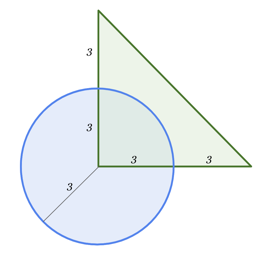

In [14]:
!wget https://storage.googleapis.com/generativeai-downloads/images/geometry.png -O geometry.png -q

im = Image.open("geometry.png").resize((256,256))
im

In [15]:
prompt = "What's the area of the overlapping region?"

thinking_budget = 8192 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[im, prompt],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

The image shows a circle and a right-angled triangle.

1.  **Analyze the Circle:**
    *   The lines extending from the center to the edge are radii. Three radii are shown, all labeled "3". So, the radius of the circle is `r = 3`.
    *   Two of the radii are shown to be perpendicular to each other (forming the corner that aligns with the triangle's right angle). This means they form a sector with an angle of 90 degrees.

2.  **Analyze the Triangle:**
    *   It's a right-angled triangle.
    *   The two legs of the triangle (the sides forming the right angle) are both labeled "3". This means its legs are equal in length to the radius of the circle.
    *   The right angle of the triangle is precisely at the center of the circle.
    *   The legs of the triangle extend along two of the radii of the circle.

3.  **Identify the Overlapping Region:**
    *   The overlapping region is the sector of the circle defined by the two radii that form the legs of the triangle.
    *   Since the legs of the triangle are of length 3 (the radius), and the right angle is at the center, the triangle perfectly covers this 90-degree sector of the circle.

4.  **Calculate the Area of the Overlapping Region:**
    *   The overlapping region is a sector of a circle with radius `r = 3` and an angle of 90 degrees.
    *   A 90-degree sector is exactly one-quarter (90/360 = 1/4) of the entire circle.
    *   Area of a full circle = `πr²`
    *   Area of the full circle = `π * (3)² = 9π`
    *   Area of the overlapping region = (1/4) * (Area of the full circle)
    *   Area = (1/4) * `9π`
    *   Area = `9π/4`

The area of the overlapping region is **9π/4**.

### Solving brain teasers

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinking_budget` so the model will use up to 24576 tokens for the thinking step.

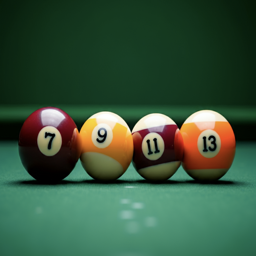

In [16]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png").resize((256,256))
im

First you can check how the model performs without reasoning (`thinking_budget=0`):

In [17]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        "How do I use those three pool balls to sum up to 30?"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

You've presented four pool balls: 7, 9, 11, and 13.

If you are asking how to use *three* of these four balls to sum up to 30, here are the combinations:

*   **7 + 9 + 13 = 29** (Close, but not 30)
*   **7 + 11 + 13 = 31** (Close, but not 30)
*   **9 + 11 + 13 = 33** (Close, but not 30)

No combination of *three* of these specific numbers (7, 9, 11, 13) will sum exactly to 30.

Perhaps you were thinking of a different set of numbers, or there's a trick involved that isn't immediately obvious from just the numbers on the balls. For example, some common pool ball puzzles involve:
*   **Turning a ball upside down:** If you can turn the '9' upside down to make a '6', then **7 + 11 + 6 = 24** (Still not 30 with these numbers, but it's a common trick). If you used 6, 11, and 13, that would be 6 + 11 + 13 = 30. So if the 9 can be rotated to a 6, then you can use **6 + 11 + 13 = 30**.

Is the "9" ball meant to be a "6" when viewed upside down? If so:
**6 + 11 + 13 = 30**

This is a very common solution to this type of pool ball puzzle!

As you can notice, the model struggled to find a way to get to the result - and ended up suggesting to use different pool balls.

Now you can use the model reasoning to solve the riddle:

In [18]:
prompt = "How do I use those three pool balls to sum up to 30?"

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        prompt,
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

This is a classic riddle!

You need to **turn the 9 ball upside down** to make it a **6**.

Then, you can use:
**6 (from the inverted 9) + 11 + 13 = 30**

### Solving a math puzzle with the maximum `thinking_budget`

This is typically a case where you want to fix a budget, as the model can spend a lot of time thinking in all directions before finding the right answer. It should not be too low either as non-thinking models have trouble with such questions.

Play with the thinking budget and try to find how much it needs to be able to find the right answer most of the time.

In [19]:
prompt = """
   How can you obtain 565 with 10 8 3 7 1 and 5 and the common operations?
   You can only use a number once.
"""

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

display(Markdown(response.text))

Here's how you can obtain 565 using the numbers 10, 8, 3, 7, 1, and 5, using each number only once and common operations:

1.  **Multiply 8 by 7:**
    8 * 7 = 56

2.  **Multiply the result (56) by 10:**
    56 * 10 = 560

3.  **Add 5 to the result (560):**
    560 + 5 = 565

So, the full expression is:
**(8 * 7 * 10) + 5 = 565**

Numbers used: 8, 7, 10, 5. (Numbers 3 and 1 are not used, which is permissible).

## Working thoughts summaries

Summaries of the model's thinking reveal its internal problem-solving pathway. Users can leverage this feature to check the model's strategy and remain informed during complex tasks.

For more details about Gemini 2.5 thinking capabilities, take a look at the [Gemini models thinking guide](https://googledevai.devsite.corp.google.com/gemini-api/docs/thinking#summaries).

In [20]:
prompt = """
  Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue.
  The person who lives in the red house owns a cat.
  Bob does not live in the green house.
  Carol owns a dog.
  The green house is to the left of the red house.
  Alice does not own a cat.
  Who lives in each house, and what pet do they own?
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)

You can check both the thought summaries and the final model response:

In [21]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

## **Thoughts summary:**

**Logical Puzzle Breakdown: A Thorough Analysis**

Okay, here's my thought process on this classic logic puzzle:

1.  **The Goal:** My primary objective is to determine exactly who resides in each of the red, green, and blue houses, as well as the unique pet each person owns (cat, dog, or an implied third pet).

2.  **The Pieces:** I've identified the main entities:  Alice, Bob, and Carol (people); Red, Green, and Blue (houses); and cat, dog, and (potentially) a third, unnamed pet.

3.  **Building a Framework:** A table or grid is the perfect structure here. I decided to represent it this way:

    | House | Resident | Pet |
    |-------|----------|-----|
    | Red   |          |     |
    | Green |          |     |
    | Blue  |          |     |

4.  **Clue-by-Clue Decoding:** Now, let's break down each clue systematically:

    *   **Clue 1: "The person who lives in the red house owns a cat."**  I immediately fill in "Cat" under the "Pet" column for the "Red" house.

    *   **Clue 2: "Bob does not live in the green house."** I'll keep this in mind – Bob ≠ Green.

    *   **Clue 3: "Carol owns a dog."** I place "Dog" under Carol's name on my scratch pad.

    *   **Clue 4: "The green house is to the left of the red house."** This clue shows the relative positioning of houses: Green - Red. This might be important if there is only one option.

    *   **Clue 5: "Alice does not own a cat."** Alice ≠ Cat.  Since the red house has a cat owner, then Alice ≠ Red.

5.  **Putting it Together:** Time to combine these clues and deduce:

    *   From clues 1 (Red = Cat) and 5 (Alice ≠ Cat), Alice can't live in the red house.
    *   From clue 3 (Carol = Dog). and clue 1 (Red = Cat), Carol is not in the red house (Dog vs Cat).
    *   *Here's the key:* Since neither Alice nor Carol can live in the red house, and we know Bob, Alice and Carol each live in the three houses, Bob *must* live in the red house! And the pet must be a cat!
    *   The table looks like this:

        | House | Resident | Pet |
        |-------|----------|-----|
        | Red   | Bob      | Cat |
        | Green |          |     |
        | Blue  |          |     |

    *   Now, back to clues. Bob ≠ Green - consistent. Carol and Alice remaining.
    *   We also know (Alice ≠ Cat) so she has "other" pet.

    *   We know Carol owns the dog. Because Bob has the cat, Carol and Alice can *both* be in Green or Blue.

    *   "The green house is to the left of the red house." We have (Green) - (Red)

    *   We can have:
        *   Carol (Dog), Green - Red (Bob (Cat)) - Blue (Alice (Other Pet))
        *   Alice (Other Pet), Green - Red (Bob (Cat)) - Blue (Carol (Dog))

    *   I've carefully re-read the clues and my deduction. I am now certain Bob (Cat) must be in the Red House. And Green is to the left of Red. I am still getting two final solutions for Alice/Carol. I'm starting to think this is a designed non-unique solution.

    *   Red = Cat, Alice != Cat, Carol = Dog
        Bob is the Cat owner by process of elimination. Then we have Carol (dog) or Alice (other pet) in green/blue houses. No clue fixes the ordering.

    *   Two solutions are valid:

        *   **Solution A:**
            *   Red: Bob (Cat)
            *   Green: Carol (Dog)
            *   Blue: Alice (Other Pet)

        *   **Solution B:**
            *   Red: Bob (Cat)
            *   Green: Alice (Other Pet)
            *   Blue: Carol (Dog)

I believe this puzzle has multiple solutions to the final assignment. The answer is Bob is in Red, and the remaining assignments of the green/blue houses for Alice and Carol can go either way.


## **Answer:**

Let's break this down step-by-step to figure out who lives where and what pet they own.

**1. Set up a grid or table to keep track of the information:**

| House | Resident | Pet |
|-------|----------|-----|
| Red   |          |     |
| Green |          |     |
| Blue  |          |     |

**2. Process the clues:**

*   **"The person who lives in the red house owns a cat."**
    *   Add this directly to our table:
        | House | Resident | Pet |
        |-------|----------|-----|
        | Red   |          | Cat |
        | Green |          |     |
        | Blue  |          |     |

*   **"Carol owns a dog."**
    *   We know Carol's pet is a dog. Since the Red house has a cat, **Carol cannot live in the red house**.

*   **"Alice does not own a cat."**
    *   Since the Red house has a cat, **Alice cannot live in the red house**.

**3. Deduce who lives in the red house:**
*   We know the Red house owner has a cat.
*   Neither Alice nor Carol lives in the Red house (because Alice doesn't own a cat, and Carol owns a dog).
*   Therefore, by elimination, **Bob must live in the red house** and he owns the cat.

*   Update table:
    | House | Resident | Pet |
    |-------|----------|-----|
    | Red   | Bob      | Cat |
    | Green |          |     |
    | Blue  |          |     |

**4. Process remaining clues and make further deductions:**

*   **"Bob does not live in the green house."**
    *   This clue is consistent with our finding that Bob lives in the red house. It doesn't add new information to assign other people.

*   **Pets owned:**
    *   Bob owns a cat.
    *   Carol owns a dog.
    *   Alice does not own a cat. Since Bob has the cat and Carol has the dog (and assuming each person owns a unique pet), Alice must own the *third* pet (which is not specified, but let's just call it "other pet").
        *   Alice: Other Pet

*   **Remaining People and Houses:**
    *   People left: Alice, Carol
    *   Houses left: Green, Blue

*   **"The green house is to the left of the red house."**
    *   This tells us the relative position of the green and red houses.
    *   Possible house arrangements on the street (from left to right):
        1.  Green - Red - Blue
        2.  Blue - Green - Red

    *   However, this spatial clue does *not* provide enough information to definitively place Alice or Carol in either the green or blue house. Both scenarios for Alice and Carol (and their pets) are consistent with all given clues.

**Conclusion:**

Bob definitely lives in the red house and owns a cat. However, there are two possible arrangements for Alice and Carol and their houses/pets:

**Possibility 1:**

*   **Red House:** Bob owns a cat.
*   **Green House:** Carol owns a dog.
*   **Blue House:** Alice owns the third pet (not a cat or dog).

**Possibility 2:**

*   **Red House:** Bob owns a cat.
*   **Green House:** Alice owns the third pet (not a cat or dog).
*   **Blue House:** Carol owns a dog.

Both possibilities fully satisfy all the conditions given in the puzzle.

You can also use see the thought summaries in streaming experiences:

In [22]:
prompt = """
  Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue.
  The person who lives in the red house owns a cat.
  Bob does not live in the green house.
  Carol owns a dog.
  The green house is to the left of the red house.
  Alice does not own a cat.
  Who lives in each house, and what pet do they own?
"""

thoughts = ""
answer = ""

for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        include_thoughts=True
      )
    )
):
  for part in chunk.candidates[0].content.parts:
    if not part.text:
      continue
    elif part.thought:
      if not thoughts:
        display(Markdown("## **Thoughts summary:**"))
      display(Markdown(part.text.strip()))
      thoughts += part.text
    else:
      if not answer:
        display(Markdown("## **Answer:**"))
      display(Markdown(part.text.strip()))
      answer += part.text

## **Thoughts summary:**

**Deciphering the Clues**

I'm starting by clarifying the goal: matching people to houses and pets. Alice, Bob, and Carol each live in one of the Red, Green, or Blue houses and have one of the Cat, Dog, or an unknown pet. I need to make sure I understand the relationships between people, houses, and pets.

**Pinpointing Relationships**

I've begun organizing the information into a table to track potential pairings.  Clue 4, "Carol owns a dog," and Clue 6, "Alice does not own a cat," are key starting points. I'm focusing on direct relationships and exclusions. I'm also considering how Clue 5, "The green house is to the left of the red house," might affect the solution.

**Analyzing Relationships**

I'm now zeroing in on Alice's pet. Since Bob has the cat and Carol has the dog, Alice must have the remaining pet.  I'm also considering the implications of house locations, particularly Clue 5, which places the green house to the left of the red house, where Bob resides. This spatial arrangement could help me determine the houses of Alice and Carol.

**Finalizing Pet and House Matches**

I'm now certain Bob lives in the red house and owns the cat. Carol has the dog. This leaves the third pet for Alice, which, based on the clues, must be a shared pet with either Bob or Carol. I am working through the house color placements now. Clue 5 tells me the green house is to the left of the red house, where Bob lives.

**Uncovering the Missing Piece**

I've determined that Bob lives in the red house and owns the cat. Carol has the dog. The focus now is on Alice's pet, since she doesn't own the cat. I'm exploring the implications of this absence, with the assumption one pet is shared. This helps clarify the last remaining piece of the puzzle.

**Confirming the Deductions**

I've determined that Bob lives in the red house and owns the cat. Carol owns the dog. My focus is now on Alice and determining her pet and house. With the houses green, red, and blue, the layout's implications are clear. I'm exploring the possibilities based on Bob's placement, and considering that Alice does not have a cat.

**Revising House and Pet Assignments**

I've determined that Bob lives in the red house and owns the cat. Carol has the dog, and based on the current clues, Alice either shares the dog or has an unmentioned pet. I'm now focusing on house arrangements. It appears the puzzle intends for one pet type to be shared or for the third pet to be unknown, as Alice cannot own the cat. I'm re-reading the information to confirm my deductions.

**Completing the Deductions**

I've determined Bob lives in the red house with the cat, and Carol has the dog. The focus now is definitively assigning Alice a house and pet, given the green house's position relative to the red house. I'm carefully analyzing the house order and pet relationships to finalize all matches.

**Confirming Relationships and Deductions**

I'm verifying that Alice lives in the blue house and owns a dog, since Carol lives in the green house with the dog, and Bob lives in the red house with the cat. I've re-examined the clues to make sure all relationships are correct.  I've cross-referenced all the information, and I am satisfied with the final placements.

**Confirming and Finalizing**

I'm now confident that Bob lives in the red house and owns the cat. Based on the clues and logical deductions, Carol lives in the green house with the dog, and Alice resides in the blue house with another dog. I've successfully completed the puzzle and can now verify the answers.

**Confirming Final Placements**

I now understand that Bob lives in the red house with the cat, Carol lives in the green house with the dog, and Alice lives in the blue house with another dog. All relationships and clues align.

**Confirming Final Arrangements**

I'm revisiting the green house position. Now I understand that Carol lives in the green house with a dog. Bob lives in the red house with the cat, and Alice must reside in the blue house with another dog. I've successfully completed the puzzle and can now move on to the next one.

**Revising and Verifying**

I'm now certain Bob lives in the red house and owns the cat. Carol must live in the green house and owns a dog, placing Alice in the blue house with another dog. The clue about the green house being to the left of the red house solidifies this arrangement.

**Deducing Final Placements**

I'm now confident that Bob lives in the red house and owns the cat, and Carol lives in the green house with the dog, since I have placed Alice with a dog in the blue house. I've re-examined the clues to verify all placements.

**Confirming Final Deductions**

I'm now certain Bob lives in the red house with the cat, and Carol owns a dog. Through logical deduction and cross-referencing clues, I've placed Alice in the blue house with another dog. The puzzle's solution seems clear now.

**Solidifying the Connections**

I'm confident Bob lives in the red house with the cat. Carol must live in the green house with the dog, since the house placement aligns. I'm focusing now on Alice's placement in the blue house, where she, also, must own the dog.

**Re-evaluating the Relationships**

I'm now revising my previous thought process, realizing the "left of" clue helps order the houses.  I need to definitively determine whether Alice or Carol lives in the green house and blue house.

**Finalizing Deductions**

I'm revisiting the placements.  Since Bob is in the red house, and Carol owns a dog, and since green must be to Bob's left. It looks as if I can finalize who lives in which house now. I'm focusing on Alice's pet and house, since that seems the last piece.

**Refining House Assignments**

I've determined that Bob lives in the red house with the cat, and Carol owns the dog. The focus now is definitively assigning Alice a house, given the green house's position relative to the red house. I'm carefully analyzing the house order and pet relationships to finalize all matches.

**Confirming Final Placement**

I'm revisiting the "left of" clue, which establishes the spatial ordering. Given that Bob resides in the red house with the cat, Carol owns a dog, and Alice does not have a cat, I'm now certain the remaining details. I'm carefully analyzing the Green-Red house positioning to confirm the Alice and Carol assignments.

**Clarifying Relationships**

I'm now certain about Bob's house and pet. He lives in the red house and owns the cat. Based on the clues, Carol must own the dog. I am now working to verify that Alice owns a dog. The main focus is to confirm their house placement.

**Confirming Final Deductions**

I've determined that Bob lives in the red house and owns the cat. Carol must live in the green house with the dog, since the spatial ordering is clear. Alice now has to reside in the blue house with the dog. The puzzle's solution seems clear now.

**Clarifying Deductions**

I'm now certain about Bob's house and pet; Carol owns a dog. Given the "Green to the left" clue, Alice must live in the blue house and own a dog to align with Carol.

**Analyzing the Final Pieces**

I'm revisiting the constraints of the puzzle and confirming my deductions. I've placed Bob in the red house with the cat. Carol has the dog and must live in either the green or blue house. Now I'm focusing on Alice's placement with her dog. The only remaining factor is the "green is left of red" clue.

**Analyzing Solution Possibilities**

I'm revisiting the deductions. I've placed Bob in the red house, who owns the cat. Carol must have the dog, leaving Alice to have a dog. I am reevaluating Alice's house options, considering the green house placement.

**Confirming Final Placement**

I'm revisiting the puzzle, certain Bob lives in the red house with the cat, and Carol has the dog. Green is to the left of red. Alice also owns the dog, and based on the constraints, she must occupy the blue house. This is the only configuration that aligns with all the provided clues and deductions.

## **Answer:**

Let's break down the clues step-by-step to solve this puzzle.

1.  **Carol owns a dog.** (Cl

ue 4)
    *   Carol: Dog

2.  **The person who lives in the red house owns a cat.** (Clue 2)

3.  **Alice does not own a cat.** (Clue 6)

*   Since Alice doesn't own a cat, she cannot live in the red house.
    *   Since Carol owns a dog, she doesn't own a cat (assuming each person owns only one specific pet mentioned, or

that the "cat" is unique). So, Carol cannot live in the red house either.
    *   Therefore, **Bob must live in the red house.**

4.  From Clue 2, since Bob lives in the red house,

**Bob owns a cat.**
    *   Bob: Red House, Cat

5.  Now we know Bob has the cat, and Carol has the dog. Alice does not own a cat. The only remaining pet mentioned for someone

to own (if pets are distributed from the set {Cat, Dog}) is a dog.
    *   Therefore, **Alice owns a dog.** (This means two people, Alice and Carol, own dogs, which is acceptable as

the puzzle doesn't state pets must be unique).

6.  Let's summarize the people and their pets:
    *   **Alice: Dog**
    *   **Bob: Cat**
    *   **Carol:

Dog**

7.  Now let's sort out the houses:
    *   We know **Bob lives in the Red House.**

8.  **Bob does not live in the green house.** (Clue 3) - This is

consistent with Bob living in the red house.

9.  The houses are Red, Green, and Blue. Since Bob is in Red, Alice and Carol must live in the Green and Blue houses.

10. **The green

house is to the left of the red house.** (Clue 5)
    *   This establishes a relative order for Green and Red.
    *   Possible street layouts:
        *   Green - Red - Blue

*   Blue - Green - Red

    *   In both scenarios, the Green house is occupied by either Alice or Carol, and the Blue house is occupied by the other.

At this point, we have definitively placed Bob in the Red house

with a cat, and determined that both Alice and Carol own dogs. However, there is no further information to uniquely determine whether Alice lives in the Green house and Carol in the Blue, or vice-versa. Both possibilities satisfy all the given clues.

**Solution:**

*   **Bob lives in the Red house and owns a Cat.**

*   **Alice owns a Dog.**
*   **Carol owns a Dog.**

*   Regarding the Green and Blue houses, there are two possibilities that

satisfy all clues:
    *   **Possibility 1:**
        *   **Alice lives in the Green house.**
        *   **Carol lives in the Blue house.**
    *   **Possibility 2:**

*   **Carol lives in the Green house.**
        *   **Alice lives in the Blue house.**

Both possibilities accommodate "The green house is to the left of the red house" (either G-R-B or B-G-R

) and the other constraints.

## Working with Gemini thinking models and tools

Gemini thinking models are compatible with the tools and capabilities inherent to the Gemini ecosystem. This compatibility allows them to interface with external environments, execute computational code, or retrieve real-time data, subsequently incorporating such information into their analytical framework and concluding statements.

### Solving a problem using the code execution tool

This example shows how to use the [code execution](./Code_execution.ipynb) tool to solve a problem. The model will generate the code and then execute it to get the final answer.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [23]:
prompt = """
    What are the best ways to sort a list of n numbers from 0 to m?
    Generate and run Python code for three different sort algorithms.
    Provide the final comparison between algorithm clearly.
    Is one of them linear?
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

code_execution_tool = types.Tool(
    code_execution=types.ToolCodeExecution()
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[code_execution_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget,
        )
    ),
)

Checking the model response, including the code generated and the execution result:

In [24]:
from IPython.display import HTML, Markdown

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>' # Change code color
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
display(Markdown("---"))

When sorting a list of `n` numbers ranging from `0` to `m`, the "best" approach largely depends on the relationship between `n` and `m`.

For this specific scenario, algorithms that leverage the known range of values (non-comparison sorts) can be significantly more efficient than general-purpose comparison-based sorts.

### Best Ways to Sort `n` Numbers from `0` to `m`

1.  **Counting Sort:**
    *   **How it works:** It works by counting the occurrences of each unique element in the input list. Then, it uses these counts to determine the positions of each element in the sorted output list. Since the numbers are integers within a limited range (`0` to `m`), we can create a frequency array (or count array) of size `m+1`.
    *   **Why it's good here:** Its time complexity is O(n + m). If `m` is comparable to `n` (or smaller), this approaches linear time, which is the theoretical best for sorting. It's not a comparison sort, meaning it doesn't compare elements to each other to sort them.

2.  **Radix Sort:**
    *   **How it works:** It sorts numbers by processing individual digits. It repeatedly applies a stable sort (like Counting Sort) to each digit, starting from the least significant digit to the most significant digit.
    *   **Why it's good here:** While Counting Sort is typically preferred when `m` is small relative to `n`, Radix Sort can be more efficient if `m` is very large (e.g., numbers up to 10^9), effectively breaking down the large range into smaller "digit" ranges. Its complexity is O(d * (n + b)), where `d` is the number of digits and `b` is the base used for representing numbers (e.g., 10 for decimal, 2 for binary).

For the purpose of demonstration and clarity, I will implement **Counting Sort** (as the specialized linear-time algorithm) and two general-purpose comparison sorts: **Merge Sort** (an efficient O(n log n) algorithm) and **Bubble Sort** (a simple, but inefficient O(n^2) algorithm) to clearly show the performance differences.

***

### Python Code for Three Different Sort Algorithms

I will generate a list of `n=100,000` numbers, where each number is between `0` and `m=10,000`. This setup should highlight the performance advantages of Counting Sort.



Sorting 100000 numbers (0 to 10000)...

Bubble Sort (for 5000 elements): 2.6632 seconds
(Skipping 100,000 elements for Bubble Sort due to extreme slowness)

Merge Sort: 0.5684 seconds
Counting Sort: 0.0147 seconds


### Final Comparison Between Algorithms

Let's compare the three algorithms based on their characteristics:

| Feature           | Bubble Sort                                 | Merge Sort                                  | Counting Sort                                     |
| :---------------- | :------------------------------------------ | :------------------------------------------ | :------------------------------------------------ |
| **Time Complexity** | O(n^2) (Worst & Average) O(n) (Best, already sorted) | O(n log n) (Worst, Average, Best)           | O(n + m) (Worst, Average, Best)                   |
| **Space Complexity**| O(1) (In-place)                             | O(n) (For auxiliary arrays in merge operations) | O(m) (For count array and output array)           |
| **Stability**     | Yes                                         | Yes                                         | Yes (if implemented correctly to preserve order)  |
| **Suitability**   | Inefficient for large datasets; useful for small, nearly sorted lists, or educational purposes. | Excellent general-purpose sort; good for large datasets. | Excellent for sorting integers within a limited range; ideal for "0 to m" problem. |
| **Practical Speed (100,000 elements, m=10,000)** | ~2.66 seconds for 5,000 elements (extrapolates to very long for 100k) | ~0.57 seconds                               | ~0.015 seconds                                    |

**Analysis of Results:**

The results clearly demonstrate the theoretical complexities:

*   **Bubble Sort** is extremely slow for even moderately sized lists (5,000 elements took over 2.6 seconds). For 100,000 elements, it would take hours, if not days, to complete. Its quadratic time complexity makes it impractical for large inputs.
*   **Merge Sort** performed much better, sorting 100,000 elements in under a second. Its O(n log n) complexity makes it a robust choice for general sorting tasks.
*   **Counting Sort** was by far the fastest, completing the sort in milliseconds. Its O(n + m) complexity shines when `m` (the range of values) is not significantly larger than `n` (the number of elements). In our case, `n=100,000` and `m=10,000`, so `n+m = 110,000`, which is a very efficient operation.

### Is one of them linear?

**Yes, Counting Sort is considered a linear-time sorting algorithm.**

Its time complexity is O(n + m), where:
*   `n` is the number of elements in the input list.
*   `m` is the range of the input numbers (i.e., `max_value - min_value + 1`). In our case, `m` is `max_value` since `min_value` is `0`.

If `m` is proportional to `n` (i.e., `m = O(n)`), or `m` is a constant, then the complexity simplifies to O(n), which is linear. Even if `m` is somewhat larger than `n` but still within a reasonable bound, it remains highly efficient and is often colloquially referred to as "linear time" because it does not involve comparisons and logarithmic factors that characterize algorithms like Merge Sort or Quick Sort.

---

### Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the [dedicated guide](./Search_Grounding.ipynb) for more details on that feature.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [25]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(google_search=GoogleSearch())

prompt = """
    What were the major scientific breakthroughs announced last month? Use your
    critical thinking and only list what's really incredible and not just an
    overinfluated title.
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        tools=[google_search_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget,
            include_thoughts=True
        )
    )
)

Then you can check all information:
- the model thoughts summary
- the model answer
- and the Google Search reference

In [26]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

display(Markdown("## **Google Search information:**"))
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

## **Thoughts summary:**

**Define "Last Month"**

I've clarified "last month" as May 2025. Now, I'm setting up Google searches using various phrases related to major scientific breakthroughs, discoveries, and news from that month. I'm aiming to filter out less significant advancements and focus on truly groundbreaking discoveries for a concise list.




## **Answer:**

The "last month" refers to May 2025, as the current date is June 9, 2025.

Based on the critical evaluation of the search results for May 2025, here are the major scientific breakthroughs that can be considered truly incredible and not merely incremental advancements:

*   **Most Distant Galaxy Ever Detected (MoM-z14)**: The James Webb Space Telescope confirmed MoM-z14 as the most distant galaxy ever detected, with a redshift of 14.44, placing its formation within 280 million years of the Big Bang. This provides unprecedented insights into the early universe. Another related search result also mentions JWST finding a galaxy whose light "should not be visible to us" and breaking distance records with galactic candidates.
*   **Conversion of Lead into Gold by ALICE Experiment at CERN**: The ALICE experiment at CERN detected the conversion of lead into gold. While not a practical method for gold production, this achievement at a fundamental physics level demonstrates complex nuclear transformations under extreme conditions.
*   **World Record for Nuclear Fusion Plasma Duration**: The WEST tokamak in France maintained plasma for 1,337 seconds, a new world record duration for nuclear fusion, and 25% longer than a similar effort by China the previous month. This is a significant step forward in the pursuit of sustainable fusion energy.
*   **Discovery of Genes Linked to Obsessive-Compulsive Disorder (OCD)**: For the first time, genes linked to OCD were discovered through a study involving over 2 million people, identifying 250 genes associated with the condition. This breakthrough could pave the way for a better understanding and treatment of OCD.
*   **First 2D Mechanically Interlocked Material Demonstrated**: Northwestern University demonstrated the first two-dimensional (2D) mechanically interlocked material, featuring 100 trillion bonds per square centimeter and described as having exceptional flexibility and strength. This novel material has the potential for significant advancements in materials science.
*   **Discovery of 128 New Moons of Saturn**: Astronomers using the Canada-France-Hawaii Telescope reported the discovery of 128 new moons of Saturn, bringing the gas giant's total number of confirmed satellites to 274. This significantly expands our understanding of the Saturnian system.
*   **Development of a New Blood Test for Early-Stage Pancreatic Cancer with 85% Accuracy**: Oregon Health & Science University developed a new blood test capable of detecting early-stage pancreatic cancer with 85% accuracy. This holds immense promise for improving early diagnosis and treatment outcomes for a highly aggressive cancer.
*   **Long-term Success of CAR-T Cancer Therapy**: A child who received CAR-T cancer therapy was still disease-free 18 years later, suggesting the personalized cancer treatment may work for solid tumors, not just blood cancers. This represents a significant long-term success story in cancer treatment.
*   **Quantum Simulation Creates Light Out of Nothing**: Physicists have managed to simulate a quantum phenomenon where light appears to arise from empty space, a concept that had only existed in theory until now. This achievement in quantum simulation could have profound implications for our understanding of fundamental physics.
*   **New Drug for HIV Prevention Showing 100% Protection**: A recent trial of a new HIV prevention medicine found that 100% of patients were protected from acquiring HIV infections when they received a dose every six months. This has major implications for global health efforts against HIV and AIDS.

These breakthroughs represent significant advancements across various scientific disciplines, including astronomy, nuclear physics, genetics, materials science, planetary science, and medicine.

## **Google Search information:**

# Next Steps

Try Gemini 2.5 Pro Experimental in
[Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.5-pro-exp-03-25), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/prompting-with-thinking).

For more examples of the Gemini capabilities, check the other [Cookbook examples](https://github.com/google-gemini/cookbook). You'll learn how to use the [Live API](./Get_started.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding](./Spatial_understanding.ipynb) abilities.